# K-NN Classifier

The original KMNIST data is computaionally cumbersome to handle in reasonable time, hence the PCA data is used. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
from csv import reader

In [29]:
def read_csv(upload):
    x=[]
    y=[]
    file = open(upload,'r')
    r = reader(file)
    count=1
    for row in r:
        if(count>1):
            x.append(row[1:])
            y.append(row[0])
        count+=1
    return [x,y]

upload = "PCA_MNIST.csv"
data = read_csv(upload)

In [30]:
y_train=data[1]
x_train=np.array(data[0]).astype(np.float64)/255

L=len(y_train)
for i in range(L):
    y_train[i]=float(y_train[i])
    y_train[i]=int(y_train[i])
    
for row in x_train:
    l=len(row)
    for idx in range(l):
        row[idx]=float(row[idx])

In [31]:
def K_NN(vec, label, max_iter):
    #randomly initialise 10 classes
    centroid=[]
    for i in range(10):
        centroid.append(np.random.rand(10))
    l=len(vec)
    count=0
    while(count<10):
        cluster=[[]]*10
        labels=[[]]*10
        for i in range(l):
            cmon=9e7
            index=0
            for j in range(10):
                dist=np.linalg.norm(np.array(vec[i]).astype(np.float64)-np.array(centroid[j]).astype(np.float64))
                if(dist<cmon):
                    cmon=dist
                    index=j
            cluster[index].append(vec[i])
            labels[index].append(label[i])
        for s in range(10):
            sum=np.sum(cluster[s])
            centroid[s]=sum/len(cluster[s])
        count+=1
    return labels

In [32]:
a=K_NN(x_train, y_train, 10)

In [36]:
print(a[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 

# GMM Clustering

In [10]:
class GMM_EM:
  #first we define a gaussian mixture model. 
  #The parameters are: g_num = number of gaussians, m_iter=the maximum number of iteration we are going to take in
  #and finally, tol=tolerance which would dictate the algorithm to stop if convergence is achieved before reaching m_iter
  #teh default values are put accordingly


    def __init__(self, m_iter=10, g_num=3, tol=1e-3):
        self.m_iter=m_iter
        self.g_num=g_num
        self.tol=tol

# We initialise the co-variance matrix and the mean in a randomised way in the EM algorithm part later, not here.
#We define the multivariate gaussian for calculation of likelihood probability.

    def train(self, Xd):
        self.x=Xd
        data_point, features = self.x.shape


    #now, initialise the weight matrix. our prior belief is that every point is equally likely to be in each of the gaussians. 
        p_0=1/self.g_num
        self.w=np.array([p_0]*self.g_num)

        #we create the mean matrix which will represent means in d dimensional feature space, as in there will be d columns as in the
        #original data
        #The row size will be equal to the number of gaussians we intend in the model.
        #it will be initialised with random values.
        from numpy.random import rand
        self.mu=rand(self.g_num, features)

        #Now,we create the covariance matrix array which will be an 3D array because each row will now store, a 2D covariance square matrix
        #the number of rows will obviously be equal to that of the number of gaussian components and the row and the column of each 
        #covariance matrix will represent the feature space. 
        #The most general initialisatoin will be that of an identity matrix.

        I=np.eye(features)
        self.cov=np.array([I]*self.g_num) 

        for i in range(self.m_iter):
            post1=self.likelihood(Xd)
            self.update_mu_cov(post1, Xd)
            post2=self.likelihood(Xd)
          #compare the likelihood functions to check for the convergence
            log1=np.sum(np.log(np.sum(post1, axis=1 )))
            log2=np.sum(np.log(np.sum(post2, axis=1 )))
            if((log1-log2)<self.tol):
                break
            self.final_log_likelihood= log2
        return post2


    def likelihood(self, Xd):
    #The likelihood matrix in the columns would have the number of gausian components.
    #In the rows it would have the number of sample points.
    
    #initialise
        data_point, features = Xd.shape
        likelihood=np.zeros((data_point, self.g_num))

    #populate according to the law of weighted likelihood
        for p in range(self.g_num):
            for s in range(data_point):
                likelihood[s, p]=self.w[p]*self.Mult_gauss(Xd[s], self.mu[p], self.cov[p])



    #define posterior
        tot_prob=np.array(np.sum(likelihood, axis=1))
        post=likelihood/tot_prob

        return post


    def update_mu_cov(self, likelihood, Xd):
        data_point, features = Xd.shape
        l=self.likelihood(Xd)

        #sum over all the weighted probabilities over the rows
        sum_p= np.sum(l, axis=0)
        #store it in a column matrix
        sum_col=np.matrix(sum_p).T

        #update the weights as sum_p normalised by the number of data points
        self.w=sum_p/data_point

        #the mean is a matrix which is obtained first by summing over all the previous means and allied probabilities. 
        self.mu=np.dot(l, Xd)
        #divide it by the likelihood sum to normalise
        self.mu= self.mu/sum_col


    #The covariance matrix is a 3D matrix, for each data point create a 2D sqaure matrix by taking dot of appropriate vectors
    #analogous to mean vector
    #iterate over the no of components and then subtract th kth row of the mean matrix from each row of the data matrix.
    #Then sqaure it, multiply with the likelihood entries and normalise to get the kth row of teh cov matrix

        for m in range(self.g_num):
            dist_m=Xd-self.mu[m]
            for i in range(Xd.shape[1]):
                self.cov[m]=[(np.dot(dist_m[:,i], dist_m[:,i]))/Xd.shape[0] for i in range(Xd.shape)]



    def ML_Gauss(self, X):
        X=np.matrix(X)
        col=X.shape[1]
        row=X.shape[0]
        mu_ML=[]
        sigma_ML=[]
        for i in range(col):
            mu_ML.append(X[:,i].mean())
            sigma_ML.append(X[:,i].var())
        return [mu_ML, sigma_ML]

    #n_c for normalisation constant.
    #prec is due to analogy to precision parameter.
    #like is for likelihood
    def Mult_gauss(self, X, mu, sigma):
        col=X.shape[0]
        prod=1
        for i in range(col):
            dist=(X[i]-mu[i])**2/(2*sigma[i]**2)
            n_c=1/(math.sqrt(2*math.pi*sigma[i]))
            p=n_c*math.exp(-dist)
            prod*=p
        return prod

In [ ]:
model=EM_GMM()

model.train(x_train)
model.likelihood(x_train)



[t-SNE] Computing 121 nearest neighbors...


C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Indexed 60000 samples in 0.363s...
[t-SNE] Computed neighbors for 60000 samples in 72.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed condit

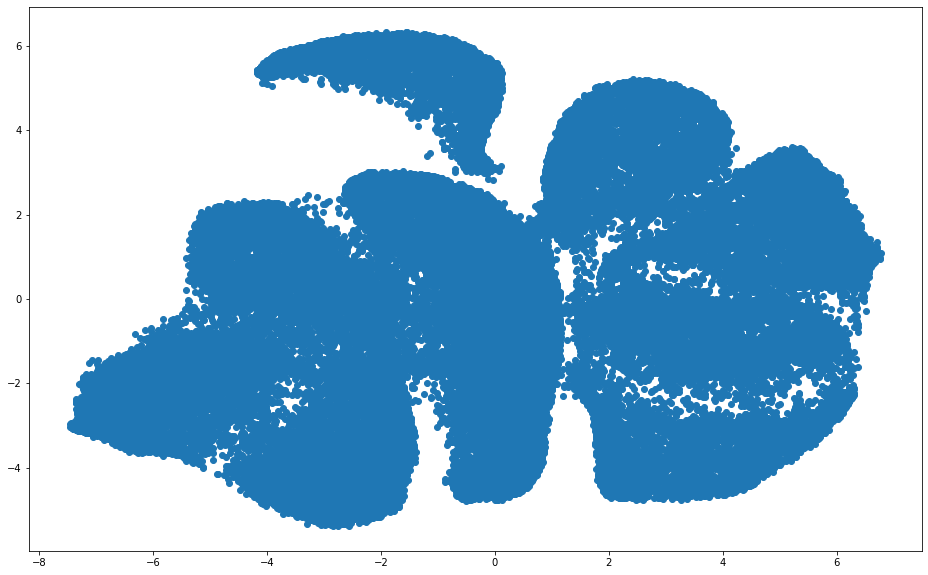

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(x_train)

X1= tsne_results[:,0]
Y1= tsne_results[:,1]

plt.figure(figsize=(16,10))
plt.scatter(X1,Y1)
plt.show()

# PCA

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
from csv import reader

In [19]:
def read_PCA(upload):
    x=[]
    y=[]
    file = open(upload,'r')
    r = reader(file)
    count=1
    for row in r:
        if(count>1):
            x.append(row[1:])
            y.append(row[0])
        count+=1
    return x

upload = "Copy of p4_train.csv"
data = read_PCA(upload)
x_PCA=np.array(data).astype(np.float64)

In [26]:
def PCA(x_PCA, d):
    #d is the number of dimensions to which projection is being done.
    mu=np.mean(x_PCA, axis=0)
    x_PCA=x_PCA-mu
    x_matrix=np.cov(x_PCA.T)
    uval, uvec=np.linalg.eigh(x_matrix)
    return uvec[:d]


def dat_var(x_PCA, d):
    a=PCA(x_PCA,d)
    a=a.T
    mu1=np.mean(a, axis=0)
    a-=mu1
    a=np.matrix(a)
    matrix=np.cov(a.T)
    return np.linalg.det(matrix) 

In [27]:
x=np.arange(100)
y=[]
for ele in x:
    y.append(dat_var(x_PCA, ele))

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.title('data variance as a function of dimensions of projection')

In [25]:
print(y)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0]
